# Proyecto Coderhouse
## Sergio Villamizar
### Septiembre 2024

**Los datos de este dataset están relacionados con campañas de marketing directo de una institución bancaria portuguesa del 2011. 
Las campañas de marketing se basaron en llamadas telefónicas. En este caso, a veces era necesario más de un contacto con el mismo cliente, 
para poder saber si el producto (depósito bancario a plazo) estaría o no suscrito al cliente.**


** Para este dataset tenemos 17 columnas,todas con informacion relevante:
- Age (edad)
- Job (trabajo)
- Marital (estado civil)
- Housing loan (prestamo de vivienda)
- Credit in default (si debe alguna cuota de un prestamo)
- Loan (prestamo)
- Education (educacion)
- Contact (tipo de contacto que se tuvo con el cliente)
- Day (ultimo dia del mes que fue contactado)
- Month (ultimo mes que fue contactado)
- Duration (duracion de la llamada en segundos)
- Poutcome (si el ultimo contacto fue satisfactorio y adquirio el prestamo)
- Y (si acepto la subscripcion)
- Pdays (cuantos dias pasaron desde su ultima vez que fue contactado)
- Previous (numero de veces contactado antes)
- Campaign (numero de veces que fue contactado para esta campana)
- Balance (promedio de balance anual en euros)**

In [ ]:
## Hipotesis
### * El estado civil de una persona influye a la hora de escoger un credito o un prestamo bancario (hay mas oportunidades de que aplique si es casado).
### * El rango de edad mas efectivo para convencer a una persona para que acepte el credito es entre los 40-50 años. Ya que esas personas tienen un trabajo estable y llevan laburando bastantes años.
### * El tipo de educacion que tenian la mayoria de personas que aceptaron el credito habian pasado secundaria.
### * La mayoria de personas que aceptaron el credito tenian trabajos de oficina es decir que toca enfocarse en esas personas mas que en las  que hacen trabajos manuales o tecnicos.
### * El balance anual de las personas que aceptaron los creditos era por encima del promedio.
### * Fueron necesarios mas de 3 contactos para que las personas accedieran al credito. 

## Objetivo

### * Comprobar las hipotesis son verdaderas.
### * Identificar posibles patrones para hacer mas efectivas las llamadas y enfocarse en el tipo de cliente que mas probabilidades tiene de adquirir el producto.
### * Entender de manera mas simple que se requiere para aumentar las posibilidades de cerrar un credito.

In [13]:
#Importar librerias para hacer graficas y traer el csv.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc

df=pd.read_csv('C:\\Users\\User\\Desktop\\Coderhouse\\Data science\\Datasets Coderhouse_datascience\\bank_full.csv')

In [14]:
# revision de columnas del dataset asegurandome que no hayan valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   job                45211 non-null  object
 2   marital            45211 non-null  object
 3   education          45211 non-null  object
 4   credit in default  45211 non-null  int64 
 5   balance            45211 non-null  int64 
 6   housing loan       45211 non-null  int64 
 7   loan               45211 non-null  int64 
 8   contact            45211 non-null  object
 9   day                45211 non-null  int64 
 10  month              45211 non-null  object
 11  duration           45211 non-null  int64 
 12  campaign           45211 non-null  int64 
 13  pdays              45211 non-null  int64 
 14  previous           45211 non-null  int64 
 15  poutcome           45211 non-null  object
 16  y                  45211 non-null  int64

In [5]:
#conteo de personas por tipo de trabajo
count_job = df['job'].value_counts()
df_count_job = count_job.reset_index()
df_count_job.columns = ['Job', 'Quantity']
print(df_count_job)

              Job  Quantity
0     blue-collar      9732
1      management      9458
2      technician      7597
3          admin.      5171
4        services      4154
5         retired      2264
6   self-employed      1579
7    entrepreneur      1487
8      unemployed      1303
9       housemaid      1240
10        student       938
11        unknown       288


In [7]:
#conteo de personas por tipo de educacion
count_education = df['education'].value_counts()
df_count_education = count_education.reset_index()
df_count_education.columns = ['Education status', 'Quantity']
print(df_count_education)

  Education status  Quantity
0        secondary     23202
1         tertiary     13301
2          primary      6851
3          unknown      1857


In [8]:
#conteo de personas por estado civil
count_marital = df['marital'].value_counts()
df_count_marital = count_marital.reset_index()
df_count_marital.columns = ['Marital status', 'Quantity']
print(df_count_marital)

  Marital status  Quantity
0        married     27214
1         single     12790
2       divorced      5207


In [9]:
#conteo de personas por tipo de contacto que tuvieron con el empleado del banco
count_contact = df['contact'].value_counts()
df_count_contact = count_contact.reset_index()
df_count_contact.columns = ['Contact', 'Quantity']
print(df_count_contact)

     Contact  Quantity
0   cellular     29285
1    unknown     13020
2  telephone      2906


In [10]:
#conteo de personas que fueron contactadas en diferentes meses
count_month = df['month'].value_counts()
df_count_month = count_month.reset_index()
df_count_month.columns = ['Month', 'Quantity']
print(df_count_month)

   Month  Quantity
0    may     13766
1    jul      6895
2    aug      6247
3    jun      5341
4    nov      3970
5    apr      2932
6    feb      2649
7    jan      1403
8    oct       738
9    sep       579
10   mar       477
11   dec       214


In [12]:
#conteo de personas por resultado previo de contacto
count_poutcome = df['poutcome'].value_counts()
df_count_poutcome = count_poutcome.reset_index()
df_count_poutcome.columns = ['Poutcome', 'Quantity']
print(df_count_poutcome)

  Poutcome  Quantity
0  unknown     36959
1  failure      4901
2    other      1840
3  success      1511


In [15]:
#verificacion de columnas de estado civil y el resultado de la llamada
print(df[['marital', 'y']].head())


   marital  y
0  married  0
1   single  0
2  married  0
3  married  0
4   single  0


In [16]:
#conteo de personas que adquirieron  o no el credito segun su estado civil.
data_counts = df.groupby(['marital', 'y']).size().reset_index(name='counts')
print(data_counts)

    marital  y  counts
0  divorced  0    4585
1  divorced  1     622
2   married  0   24459
3   married  1    2755
4    single  0   10878
5    single  1    1912


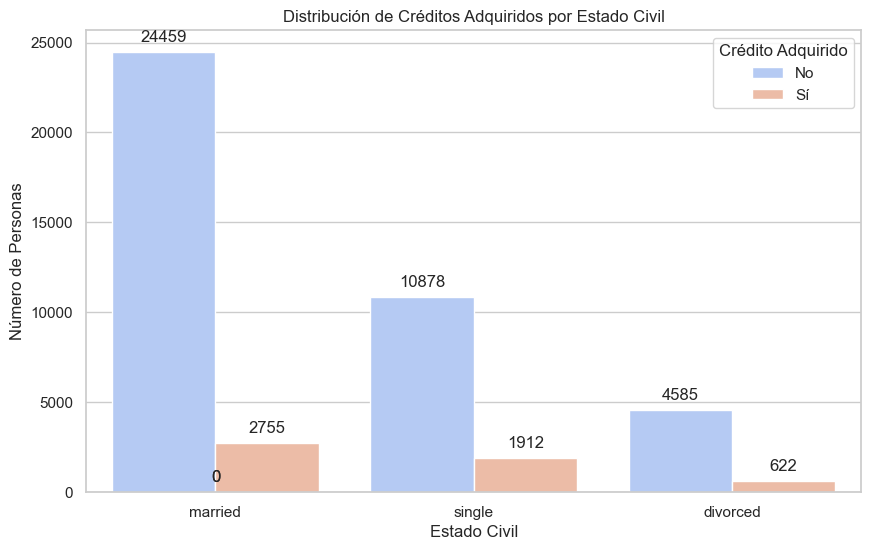

In [21]:
### * El estado civil de una persona influye a la hora de escoger un credito o un prestamo bancario (hay mas oportunidades de que aplique si es casado).
# Configuración del estilo
sns.set(style="whitegrid")

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras agrupadas y la paleta
ax = sns.countplot(x='marital', hue='y', data=df, palette='coolwarm')

# Crear títulos y etiquetas
plt.title('Distribución de Créditos Adquiridos por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Personas')

# Añadir las etiquetas de datos en cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                xy=(p.get_x() + p.get_width() / 2., height), 
                xytext=(0, 5), 
                textcoords='offset points', 
                ha='center', va='bottom')

plt.legend(title='Crédito Adquirido', labels=['No', 'Sí'])
plt.show()


In [ ]:
### * El estado civil de una persona influye a la hora de escoger un credito o un prestamo bancario (hay mas oportunidades de que aplique si es casado).
### Respuesta: Con este grafico podemos deducir que de las 27214 personas casadas solo el 11.2%  adquirieron el producto bancario. Por otro lado, de las personas 12790 personas solteras 
### el 17.5% aceptaron el producto bancario y por ultimo el 11.9% de las personas divorciadas (total 5207) adquisieron el producto.
### Concluyendo que aunque las personas solteras tienen un porcentaje mayor de adquisicion de producto bancario no es significativo comparando las otras 2 poblaciones
###que tienen un 11% respectivamente*

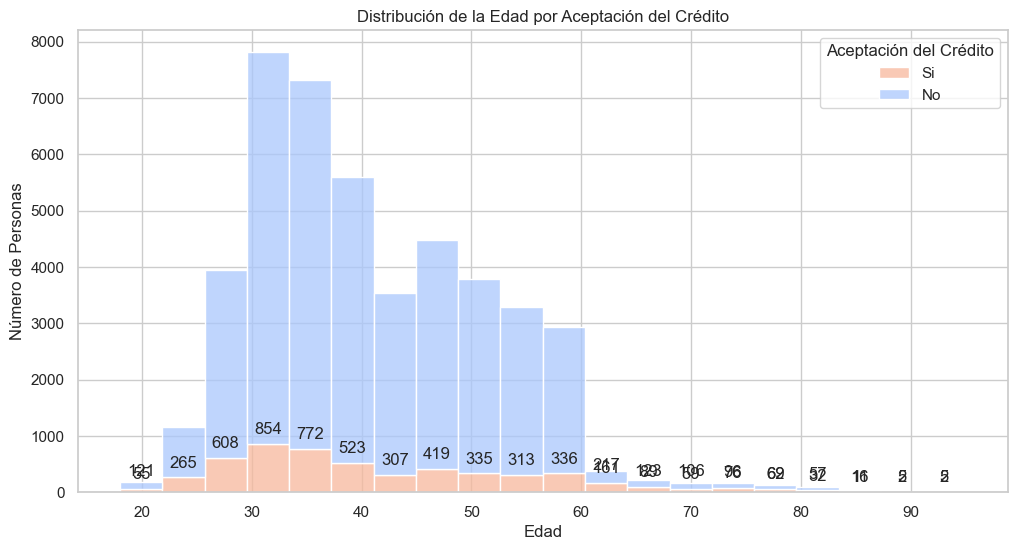

In [33]:
### * El rango de edad mas efectivo para convencer a una persona para que acepte el credito es entre los 40-50 años. Ya que esas personas tienen un trabajo estable y 
### llevan laburando bastantes años.
# Configuración del estilo
sns.set(style="whitegrid")

# Crear la figura y el eje
plt.figure(figsize=(12, 6))

# Crear el histograma
ax = sns.histplot(data=df, x='age', hue='y', multiple='stack', palette='coolwarm', bins=20)

# Añadir títulos y etiquetas
plt.title('Distribución de la Edad por Aceptación del Crédito')
plt.xlabel('Edad')
plt.ylabel('Número de Personas')

# Agregar etiquetas de datos en cada barra
for container in ax.containers:
    # Para cada contenedor (barra) en el histograma
    for patch in container:
        height = patch.get_height()
        if height < 855:  # Solo agregar etiquetas para barras con altura positiva menor a 855
            # Obtener la posición de la barra
            ax.annotate(f'{int(height)}',
                        xy=(patch.get_x() + patch.get_width() / 2., height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom')

# Mostrar el gráfico
plt.legend(title='Aceptación del Crédito', labels=['Si', 'No'])
plt.show()



In [ ]:
### De esta grafica podemos concluir que el rango de edad se situa entre los 25 y 40 años.
### Se pueden centrar los esfuerzos y llamadas a las personas que tengan edad entre 25 y 40 años, evitando llamar a personas por encima de los 65 y por debajo de los 20.

<Figure size 1200x600 with 0 Axes>

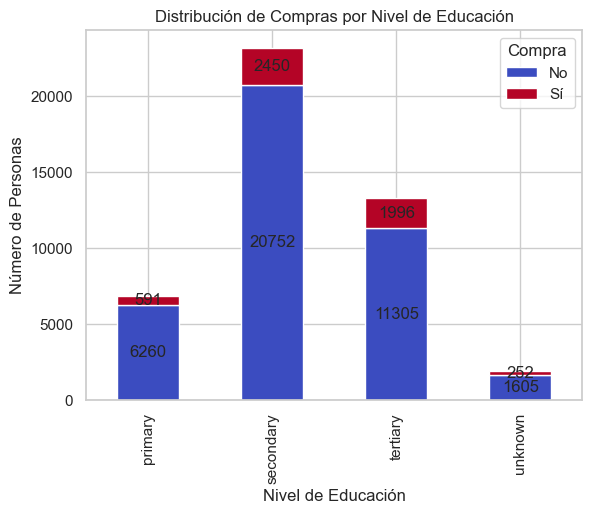

In [34]:
### * El tipo de educacion que tenian la mayoria de personas que aceptaron el credito habian pasado secundaria.

# Crear una tabla de contingencia
contingency_table = pd.crosstab(df['education'], df['y'])

# Crear la figura y el eje
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True, colormap='coolwarm')

# Añadir títulos y etiquetas
plt.title('Distribución de Compras por Nivel de Educación')
plt.xlabel('Nivel de Educación')
plt.ylabel('Número de Personas')

# Añadir etiquetas de datos en cada barra
for i in range(len(contingency_table.index)):
    bottom = 0
    for j in range(len(contingency_table.columns)):
        height = contingency_table.iloc[i, j]
        if height > 0:  # Solo añadir etiquetas para barras con altura positiva
            plt.text(i, bottom + height / 2, f'{int(height)}',
                     ha='center', va='center')
        bottom += height

# Mostrar el gráfico
plt.legend(title='Compra', labels=['No', 'Sí'])
plt.show()


In [ ]:
### Aca confirmarmamos que la mayoria de personas que adquirieron el producto tienen una educacion secundaria, sin embargo seria solo el 10.5% del total de la gente que estudio secundaria.
### Comparado con educacion terciaria que es el 15% del total de ellos que adquirio el producto. Siendo mas eficaz llamar a este tipo de personas. 

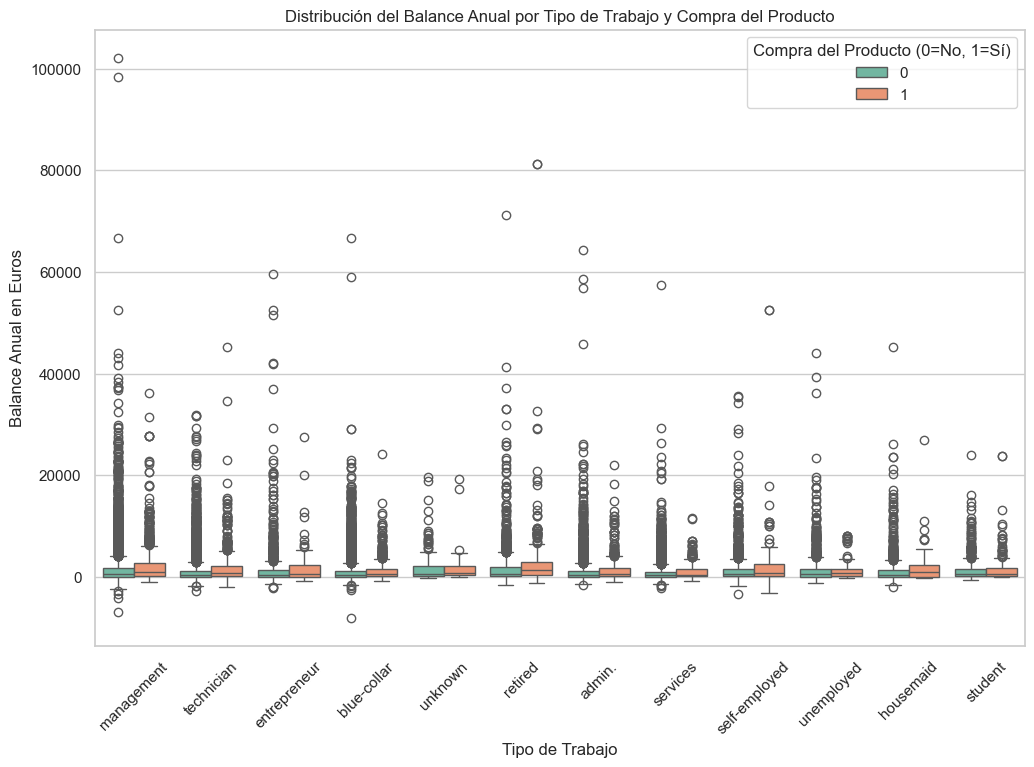

In [37]:
### * La mayoria de personas que aceptaron el credito tenian trabajos de oficina es decir que toca enfocarse en esas personas mas que en las  que hacen trabajos manuales o tecnicos.
### Blue collar, management vs technicians, services, house-maids
# Configuración del estilo
sns.set(style="whitegrid")

# Crear el gráfico de cajas
plt.figure(figsize=(12, 8))
sns.boxplot(x='job', y='balance', hue='y', data=df, palette="Set2")

# Añadir títulos y etiquetas
plt.title('Distribución del Balance Anual por Tipo de Trabajo y Compra del Producto')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Balance Anual en Euros')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.legend(title='Compra del Producto (0=No, 1=Sí)')
plt.show()



In [ ]:
### Podemos ver la distribucion del balance anual con el tipo de trabajo de las personas y si aceptaron o no comprar el producto. Aca vemos que las personas
### que trabajan en "Management", "Retired", "Self_employed", "Housemaids" y "Entrepreneurs" son personas que pueden ser buenos objetivos para venderles el producto
### independientemente de su balance anual.

   balance  y
0     2143  0
1       29  0
2        2  0
3     1506  0
4        1  0
Matriz de Confusión:
[[7947    5]
 [1091    0]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7952
           1       0.00      0.00      0.00      1091

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.77      0.88      0.82      9043

Área Bajo la Curva ROC (AUC): 0.5968844114180961


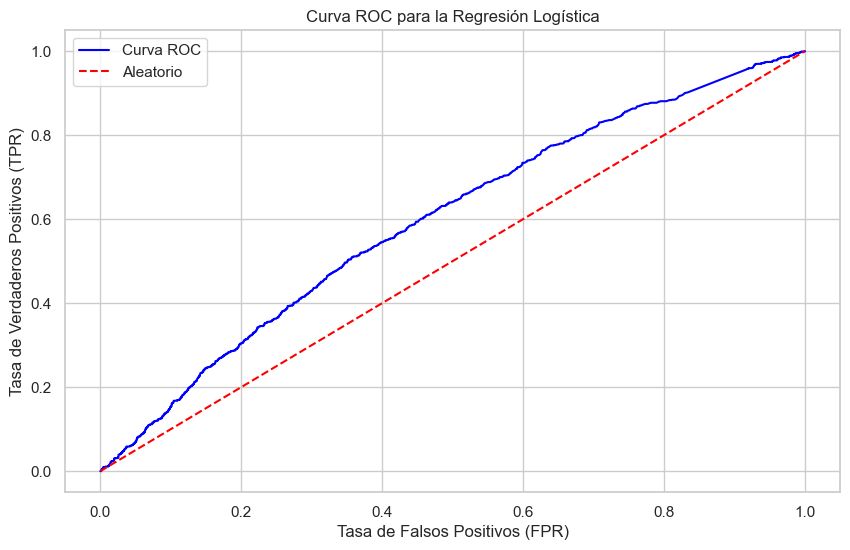

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
print(df[['balance', 'y']].head())

# Definir la variable independiente (predictora) y la variable dependiente (respuesta)
X = df[['balance']]  # Variable independiente
y = df['y']          # Variable dependiente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva (1)
# Evaluar el rendimiento del modelo
print('Matriz de Confusión:')
print(confusion_matrix(y_test, y_pred))

print('\nInforme de Clasificación:')
print(classification_report(y_test, y_pred))

print('Área Bajo la Curva ROC (AUC):', roc_auc_score(y_test, y_prob))
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Crear la curva ROC
plt.plot(fpr, tpr, color='blue', label='Curva ROC')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Aleatorio')

# Añadir títulos y etiquetas
plt.title('Curva ROC para la Regresión Logística')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')

# Mostrar el gráfico
plt.legend()
plt.show()


### Un modelo de clasificación es mejor cuanto más alta es el area de la curva. Al tener un area de 0.59688 podemos considerar que no es suficiente para  basarnos en estos datos. Unos
### valores entre [0.9, 0.97) serian perfectos para poder tomar en cuenta esta grafica. Es decir que el balance anual de una persona no necesariamente influye en la compra del producto.

C:\Users\User\AppData\Local\Temp\ipykernel_9444\1486878584.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y='campaign', data=df, palette="Set2")


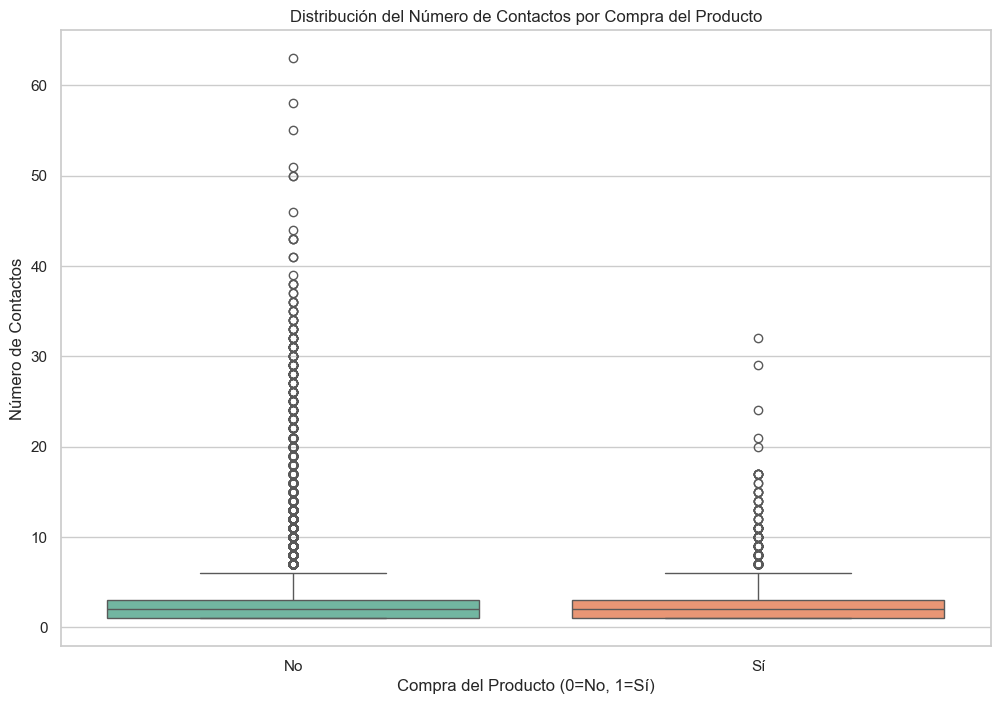

In [42]:
### Grafica de distribucion de numero de contactos por compra del producto bancario

# Configuración del estilo
sns.set(style="whitegrid")

# Crear el gráfico de cajas
plt.figure(figsize=(12, 8))
sns.boxplot(x='y', y='campaign', data=df, palette="Set2")

# Añadir títulos y etiquetas
plt.title('Distribución del Número de Contactos por Compra del Producto')
plt.xlabel('Compra del Producto (0=No, 1=Sí)')
plt.ylabel('Número de Contactos')

# Mostrar el gráfico
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()


In [ ]:
### Con esta grafica de cajas podemos observar que mas de 20 contactos para adquirir el prodcuto es ineficiente puesto que la mayoria se concentra por debajo de 20 contactos.